# Exploratory Data Analysis - Retail

By - Bhagyashree

The main objective of this task is to perform Exploratory Data Analysis on dataset Sample Superstore and find out the weak areas where we can work to make more profit and derive if there are any other business problems.

In [184]:
#Importing the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [185]:
#Reading and Displaying the Dataset
store_df = pd.read_csv('SampleSuperstore.csv')
store_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [186]:
#Displaying the information of the dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [187]:
#Data Description
store_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Preprocessing

In [188]:
store_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [189]:
store_df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [190]:
store_df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [191]:
#Checking for null values
store_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [192]:
print("total number of null values = ", store_df.isnull().sum().sum())

total number of null values =  0


In [193]:
store_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [194]:
store_df.shape

(9994, 13)

In [195]:
#Finding correlation of the dataset
store_df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [196]:
#Finding covariance of the dataset
store_df.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


# Exploratory Data Analysis and Visualization

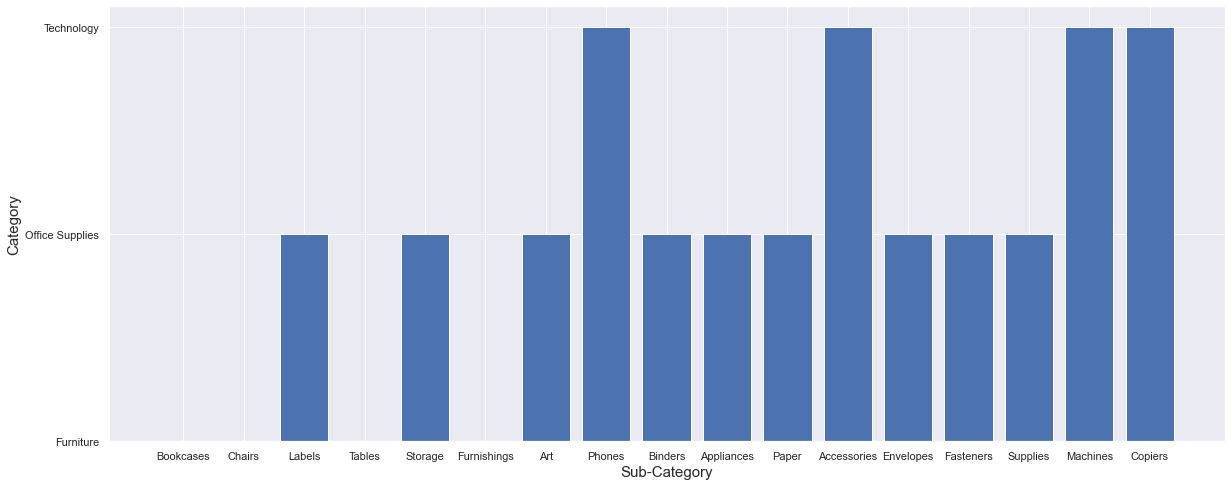

In [197]:
plt.figure(figsize=(20,8))
plt.bar('Sub-Category','Category', data=store_df)
sns.set(style="darkgrid")
plt.xlabel('Sub-Category', fontsize=15)
plt.ylabel('Category', fontsize=15)
plt.show()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

<function matplotlib.pyplot.show(close=None, block=None)>

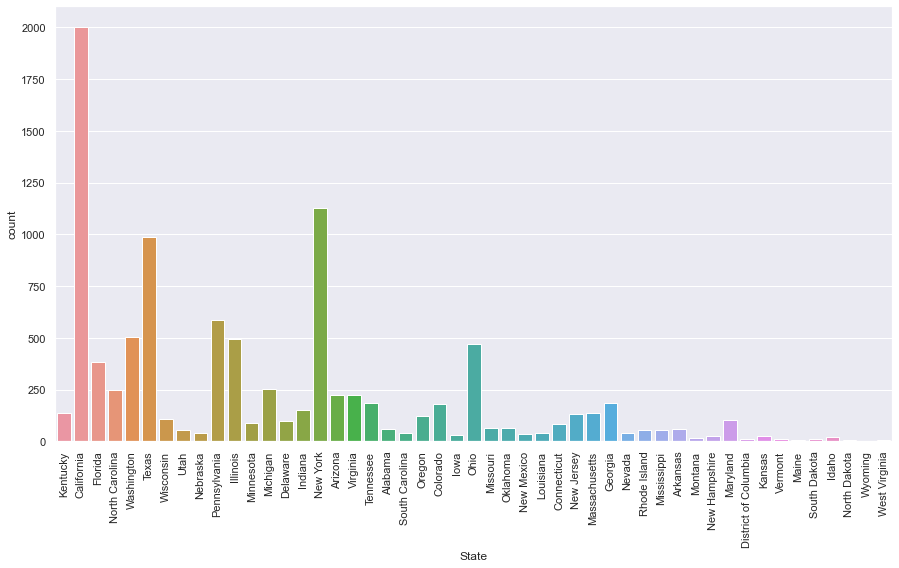

In [198]:
#Printing the state count
print(store_df['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.show

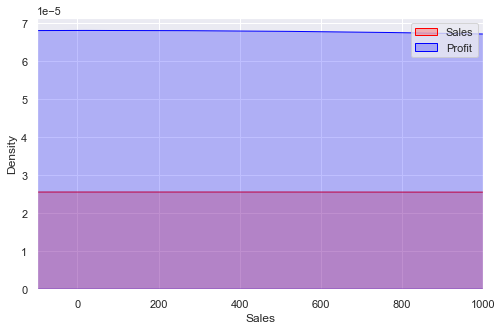

In [199]:
plt.figure(figsize=(8,5))
sns.kdeplot(store_df['Sales'],color='red',label='Sales',shade=True,bw=25)
sns.kdeplot(store_df['Profit'],color='Blue',label='Profit',shade=True,bw=25)
plt.xlim([-100,1000])
plt.legend()

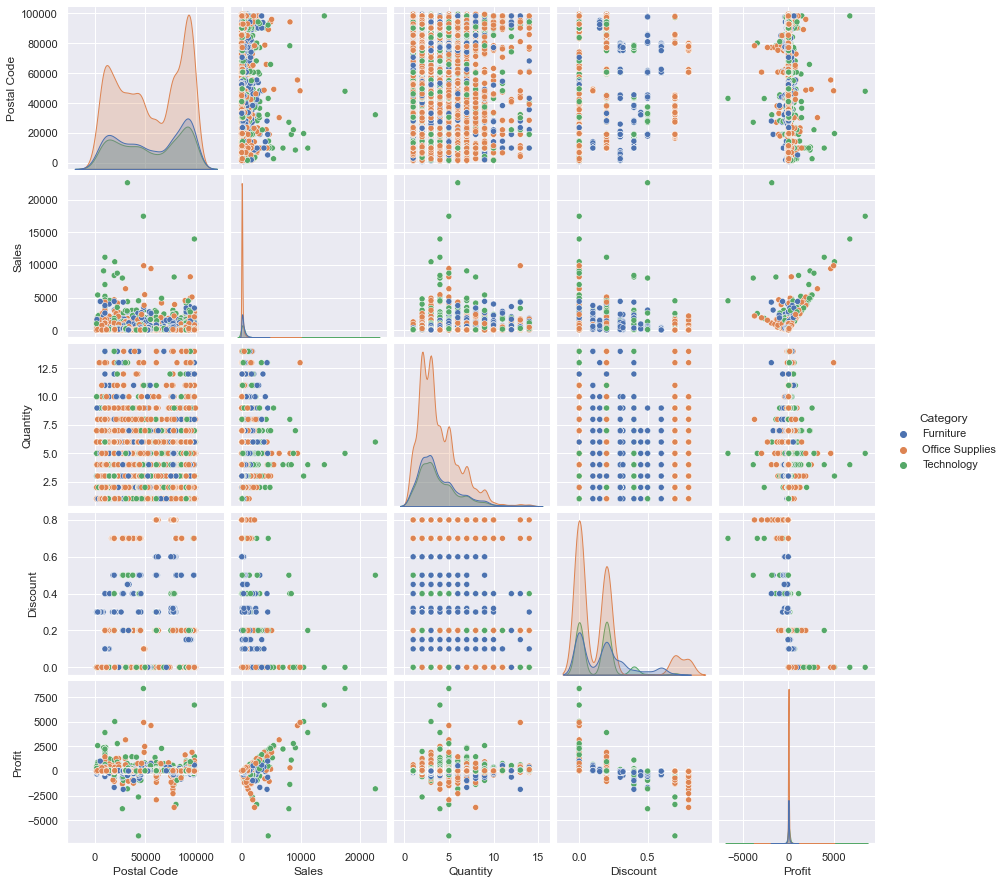

In [200]:
#Based on the category
sns.pairplot(store_df,hue='Category')

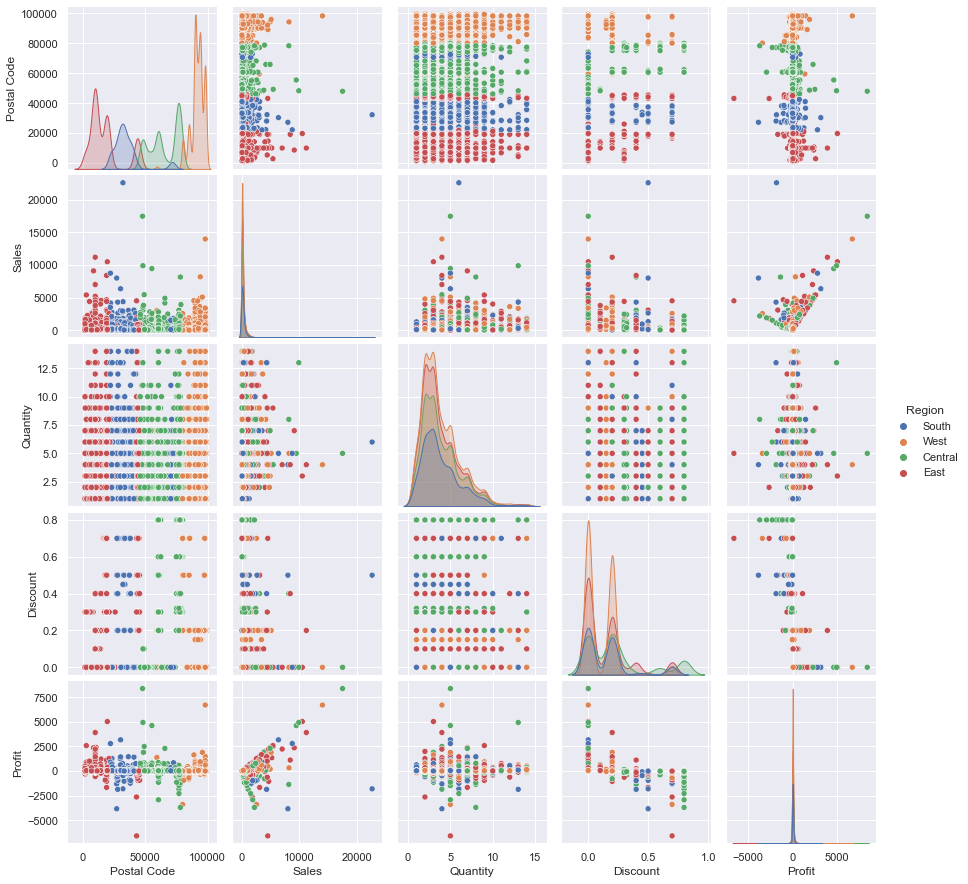

In [201]:
#Based on Region
sns.pairplot(store_df,hue='Region')

<AxesSubplot:>

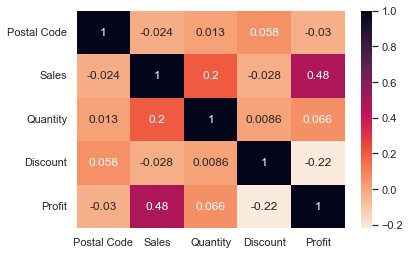

In [202]:
#Heatmap for Correlation
sns.heatmap(store_df.corr(),cmap='rocket_r',annot=True)

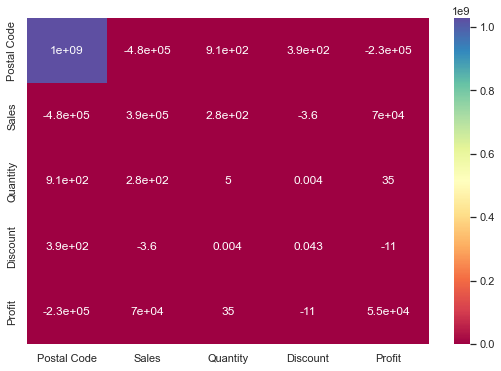

In [203]:
#Heatmap of Covariance
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(store_df.cov(), annot= True, cmap= 'Spectral')
plt.show()

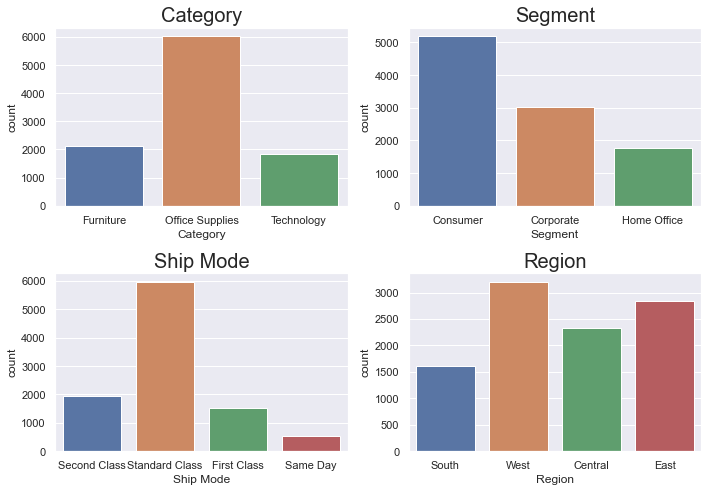

In [204]:
#Counting plot of each column
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(store_df['Category'],ax=axs[0][0])
sns.countplot(store_df['Segment'],ax=axs[0][1])
sns.countplot(store_df['Ship Mode'],ax=axs[1][0])
sns.countplot(store_df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)

plt.tight_layout()

1. The office supplies category is the most used category
2. The consumer segment is very high in demand 
3. The standard class is the most preferred shipping mode
4. The west and east region has good customer base as compared to south and central region 


Text(0.5, 1.0, 'Sub-Category')

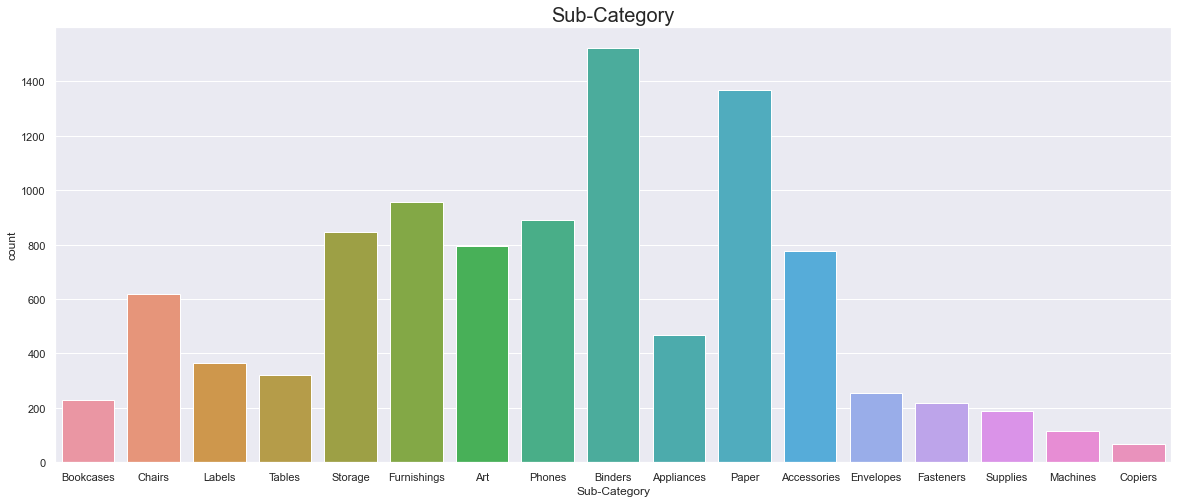

In [138]:
plt.figure(figsize=(20,8))
sns.countplot(store_df['Sub-Category'])
plt.title('Sub-Category',fontsize=20)

The binders, paper and furnishings are most frequently used sub-categories

Text(0.5, 1.0, 'Quantity')

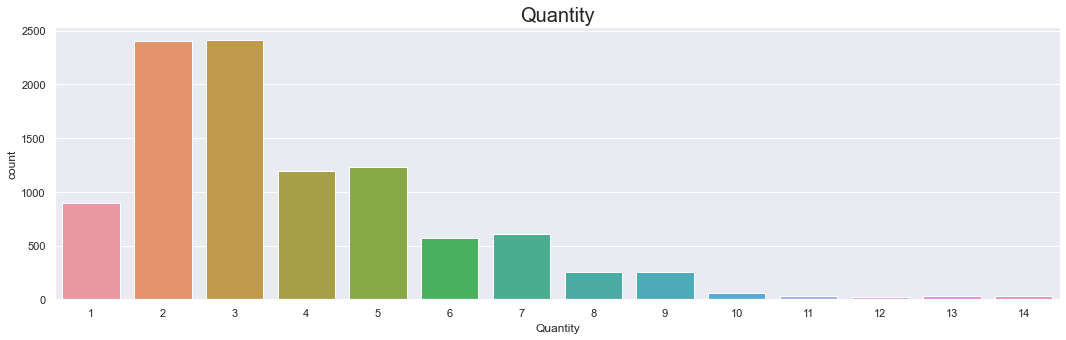

In [139]:
plt.figure(figsize=(18,5))
sns.countplot(store_df['Quantity'])
plt.title('Quantity',fontsize=20)

Text(0.5, 1.0, 'Discount')

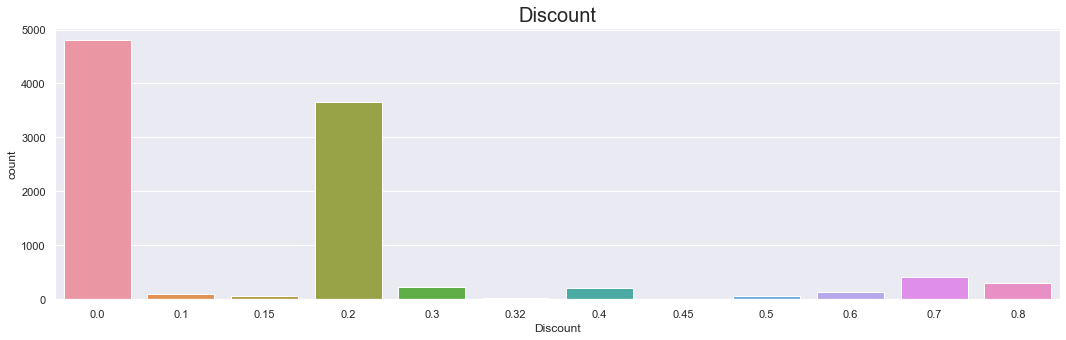

In [205]:
plt.figure(figsize=(18,5))
sns.countplot(store_df['Discount'])
plt.title('Discount',fontsize=20)

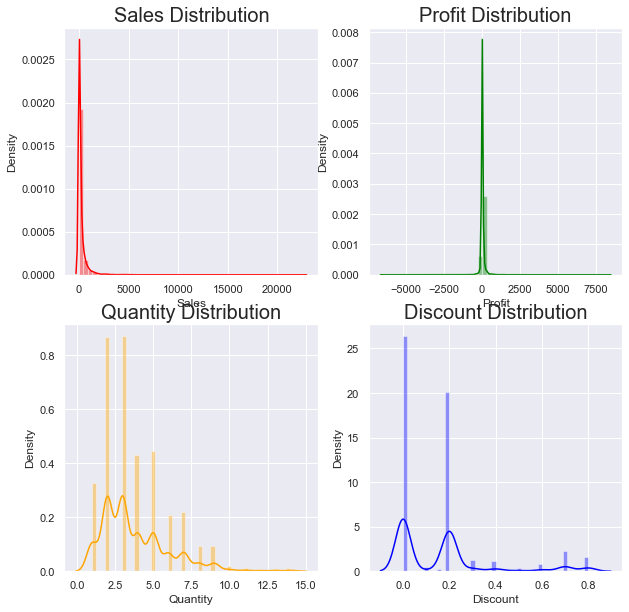

In [206]:
#Distributions of the data using the plot
fig, axs = plt.subplots(ncols=2, nrows= 2, figsize = (10,10))
sns.distplot(store_df['Sales'],color='red',ax = axs[0][0])
sns.distplot(store_df['Profit'],color='green',ax = axs[0][1])
sns.distplot(store_df['Quantity'],color='orange',ax = axs[1][0])
sns.distplot(store_df['Discount'],color='blue',ax = axs[1][1])
axs[0][0].set_title('Sales Distribution',fontsize=20)
axs[0][1].set_title('Profit Distribution',fontsize=20)
axs[1][0].set_title('Quantity Distribution',fontsize=20)
axs[1][1].set_title('Discount Distribution',fontsize=20)
plt.show()

### Statewise analysis of the dealing

In [207]:
store_df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [208]:
store_df1=store_df['State'].value_counts()
store_df1.head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

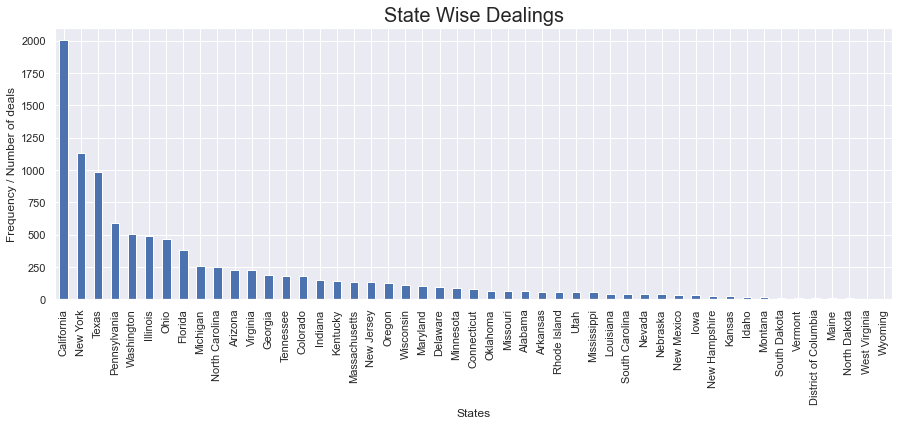

In [209]:
store_df1.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')

plt.title('State Wise Dealings',fontsize = 20)
plt.show()

Highest Number of Deal :- California,
Lowest Number of Deal :- Wyoming  

In [210]:
store_df['State'].value_counts().mean()

203.9591836734694

Average number of deal per state is 204

### City wise analysis of the dealing

In [211]:
store_df2=store_df['City'].value_counts()
store_df2=store_df2.head(50)

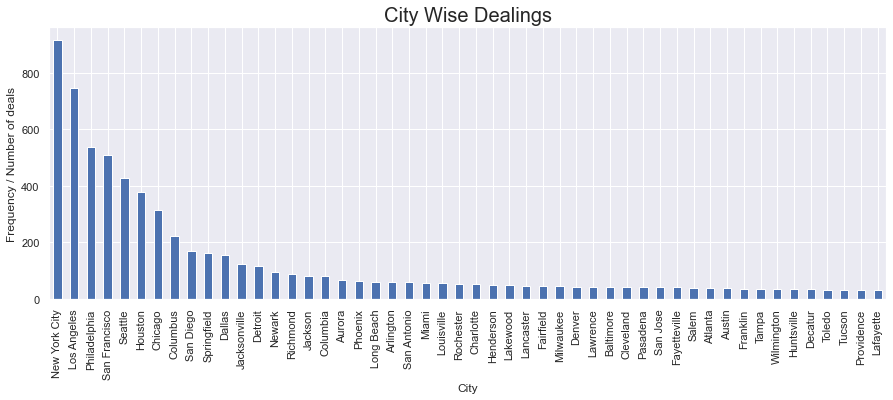

In [212]:
store_df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings',fontsize = 20)
plt.show()

Highest Number of Deal :- New York City, Lowest Number of Deal :- Lafayette

In [213]:
store_df['City'].value_counts().mean()

18.821092278719398

Average number of deals per city is 19

### Segment wise analysis of sales, discount and profit

In [214]:
store_df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [215]:
store_df_Segment=store_df.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
store_df_Segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount , Profit')

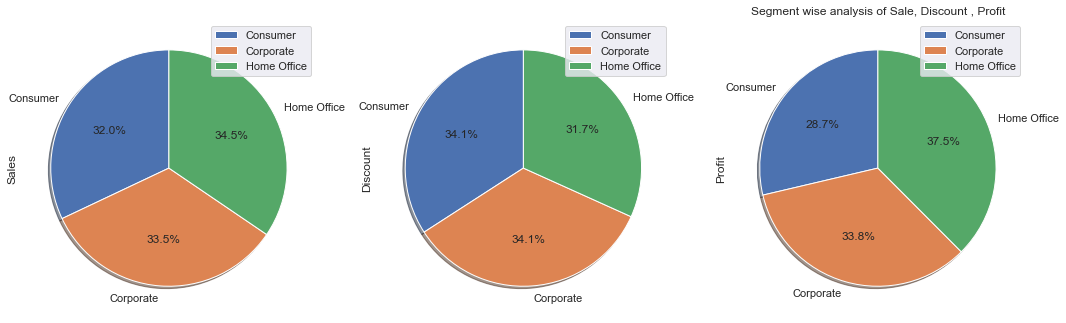

In [216]:
store_df_Segment.plot.pie(subplots=True,
                   autopct='%1.1f%%',
                   figsize=(18,20),
                   startangle=90,     # start angle 90(Africa)
                   shadow=True,
                   labels = store_df_Segment.index)
plt.title('Segment wise analysis of Sale, Discount , Profit')

### Quantity wise analysis of sales, discount and profit 

In [217]:
store_df_quantity = store_df.groupby(['Quantity'])[['Sales','Discount','Profit']].mean()
store_df_quantity.head(10)

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.354488,0.154858,16.006831
3,175.201578,0.153329,23.667715
4,271.764059,0.157708,37.131310
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


Text(0.5, 1.0, 'quantity wise analysis of Sale, Discount , Profit')

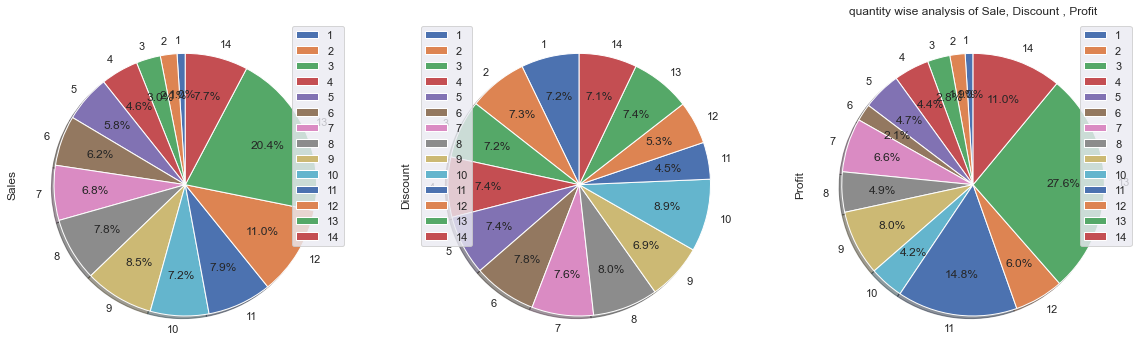

In [218]:
store_df_quantity.plot.pie(subplots=True,
                   autopct='%1.1f%%',
                   figsize=(20,20),
                     pctdistance=0.69,
                   startangle=90,     # start angle 90(Africa)
                   shadow=True,
                   labels = store_df_quantity.index)
plt.title('quantity wise analysis of Sale, Discount , Profit')


### Category wise analysis of sales discount and profit

In [219]:
store_df_category = store_df.groupby(['Category'])[['Sales','Discount','Profit']].mean()
store_df_category

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

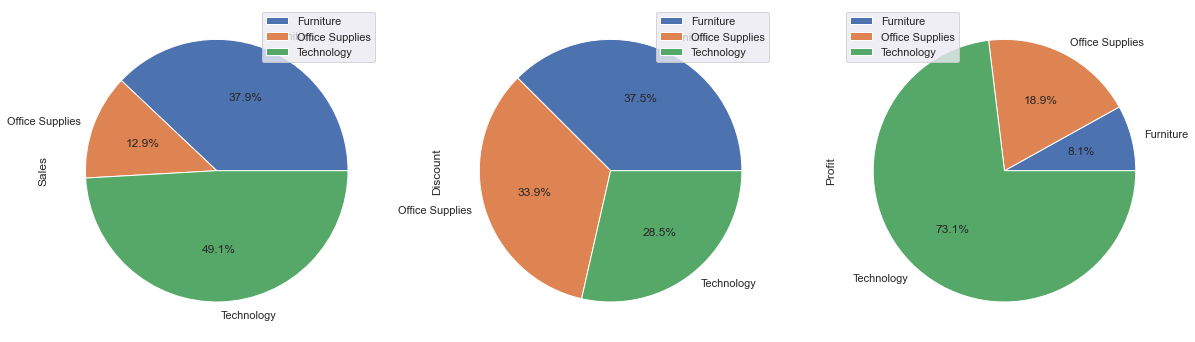

In [220]:
store_df_category.plot.pie(subplots=True,
                     figsize=(20,20),
                   autopct='%1.1f%%',
                   labels = store_df_category.index)

### Sub-Category wise analysis of sales, discount and profit

In [221]:
store_df_Sub_Category = store_df.groupby(['Sub-Category'])[['Sales','Discount','Profit']].mean()
store_df_Sub_Category.head(10)

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


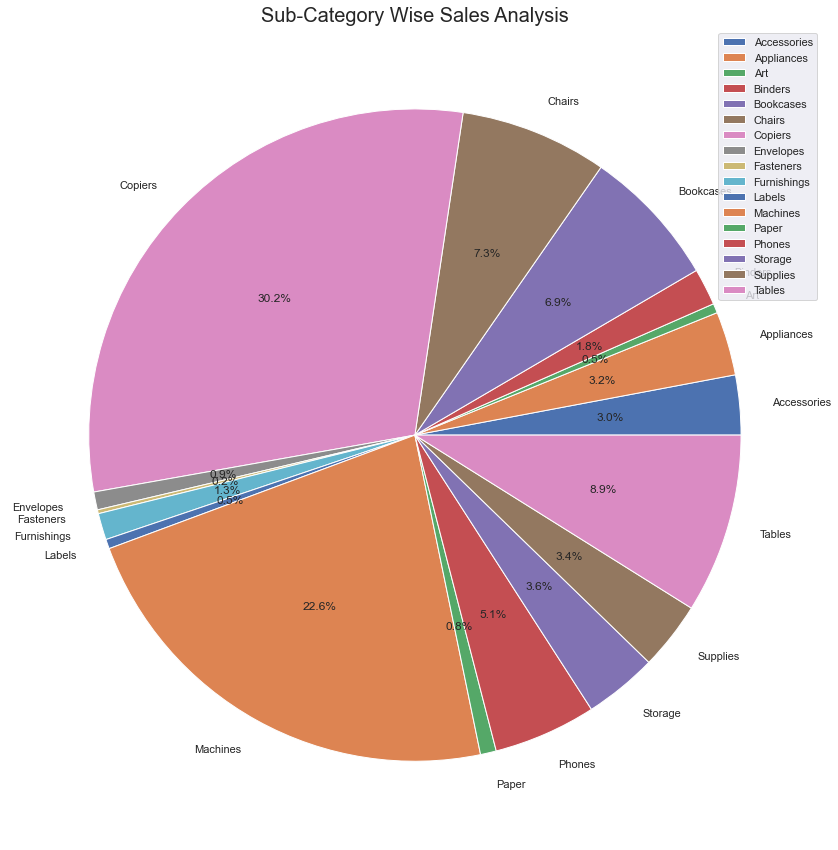

In [222]:
#Sales
plt.figure(figsize=(15,15))
plt.pie(store_df_Sub_Category['Sales'],labels = store_df_Sub_Category.index,autopct = '%1.1f%%')
plt.title('Sub-Category Wise Sales Analysis',fontsize =20)
plt.legend()
plt.xticks(rotation=90)
plt.show()

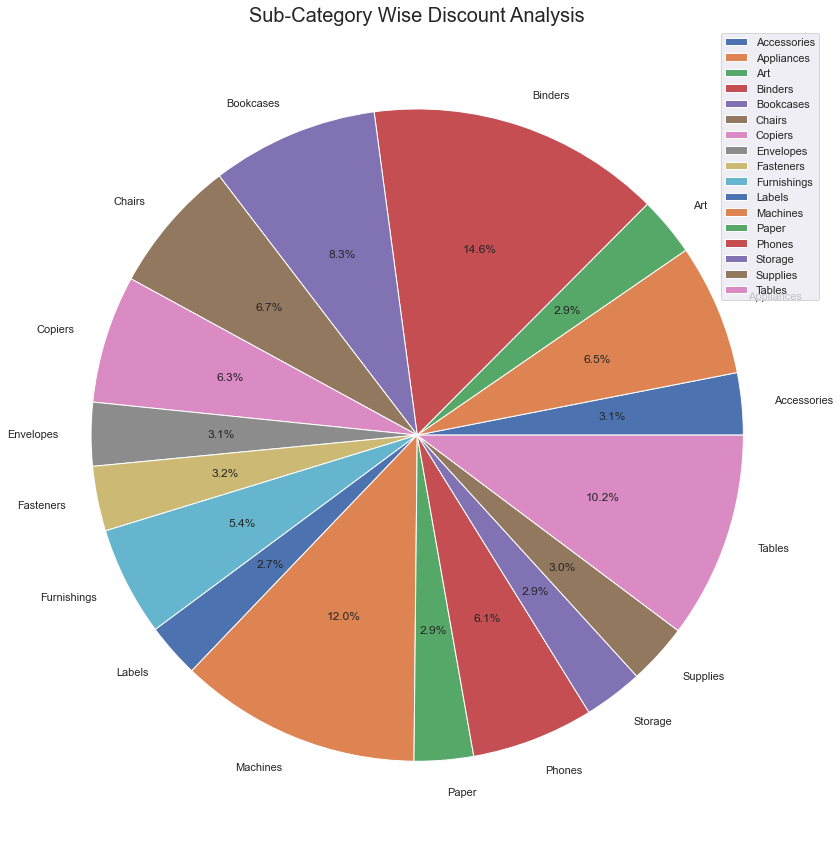

In [223]:
#Discount
plt.figure(figsize=(15,15))
plt.pie(store_df_Sub_Category['Discount'],labels = store_df_Sub_Category.index,autopct = '%1.1f%%')
plt.title('Sub-Category Wise Discount Analysis',fontsize =20)
plt.legend()
plt.xticks(rotation=90)
plt.show()

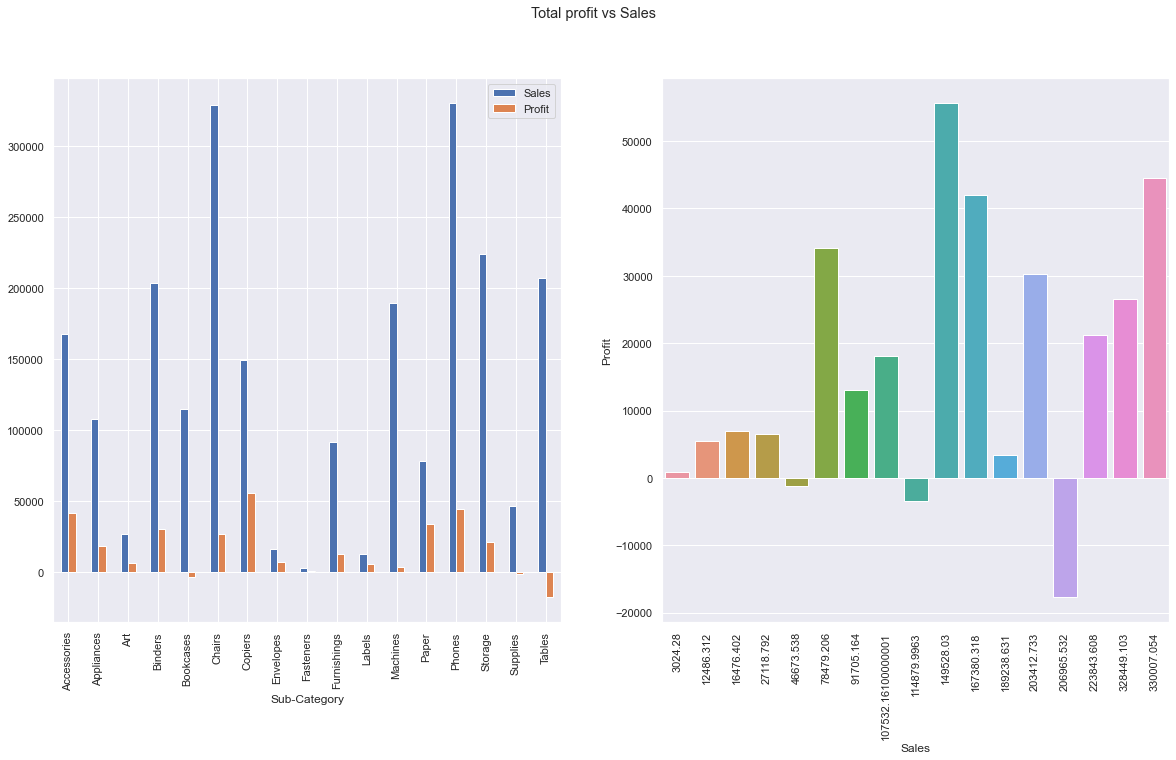

In [224]:
#Barplot showing the relation between the sales and profits grouping by Sub-Categories
fig,axes = plt.subplots(1,2,figsize=(20,10))
fig.suptitle("Total profit vs Sales")
sns.barplot(data = store_df.groupby("Sub-Category")["Sales","Profit"].agg(sum), x = "Sales",y = "Profit",ax = axes[1])
store_df.groupby("Sub-Category")["Sales","Profit"].agg(sum).plot(kind = "bar",ax = axes[0])
plt.xticks(rotation =90)
plt.show()

Sale is high, The maximum profit of product in demand is 550000

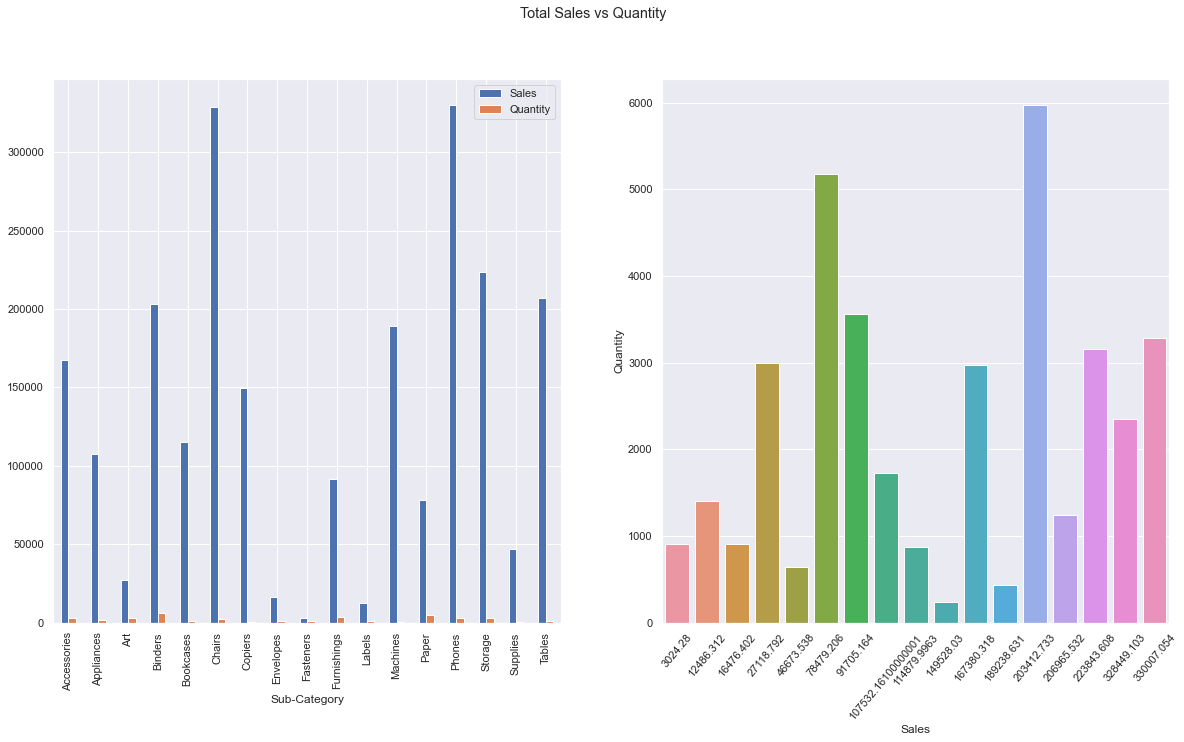

In [225]:
#Barplot showing the relation between the sales and Quantity grouping by Sub-Categories
fig,axes = plt.subplots(1,2,figsize=(20,10))
fig.suptitle("Total Sales vs Quantity")
sns.barplot(data = store_df.groupby("Sub-Category")["Sales","Quantity"].agg(sum), x = "Sales",y = "Quantity",ax = axes[1])
store_df.groupby("Sub-Category")["Sales","Quantity"].agg(sum).plot(kind = "bar",ax = axes[0])
plt.xticks(rotation =50)
plt.show()

Sales is high over quantity, The maximum quantity of product in demand is in the range 2-5

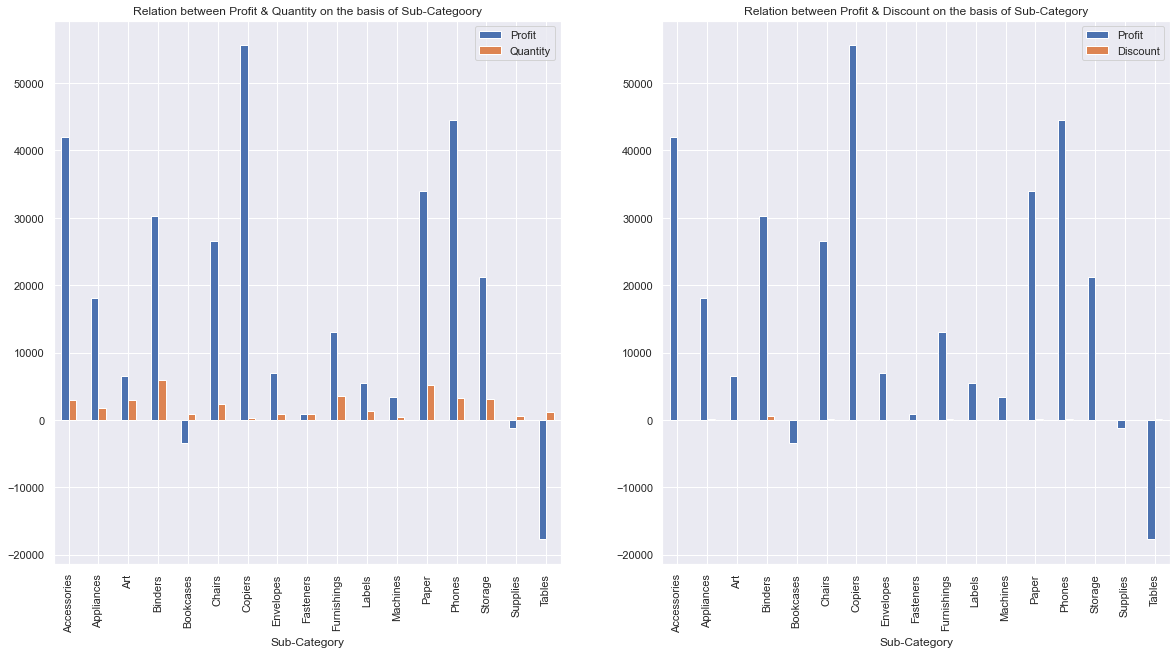

In [226]:
#Bar plot showing relation between Profit, Quantity and Discount followed by their Sub-Catgeory
fig,axes = plt.subplots(1,2,figsize=(20,10))
store_df.groupby("Sub-Category")["Profit","Quantity"].agg(sum).plot(kind = "bar",ax = axes[0]).set_title("Relation between Profit & Quantity on the basis of Sub-Categoory")
store_df.groupby("Sub-Category")["Profit","Discount"].agg(sum).plot(kind = "bar",ax = axes[1]).set_title("Relation between Profit & Discount on the basis of Sub-Category")
plt.xticks(rotation =90)
plt.show()

The features of profit and discount are highly related, In the Sub Category tables loss is maximum followed by bookcases

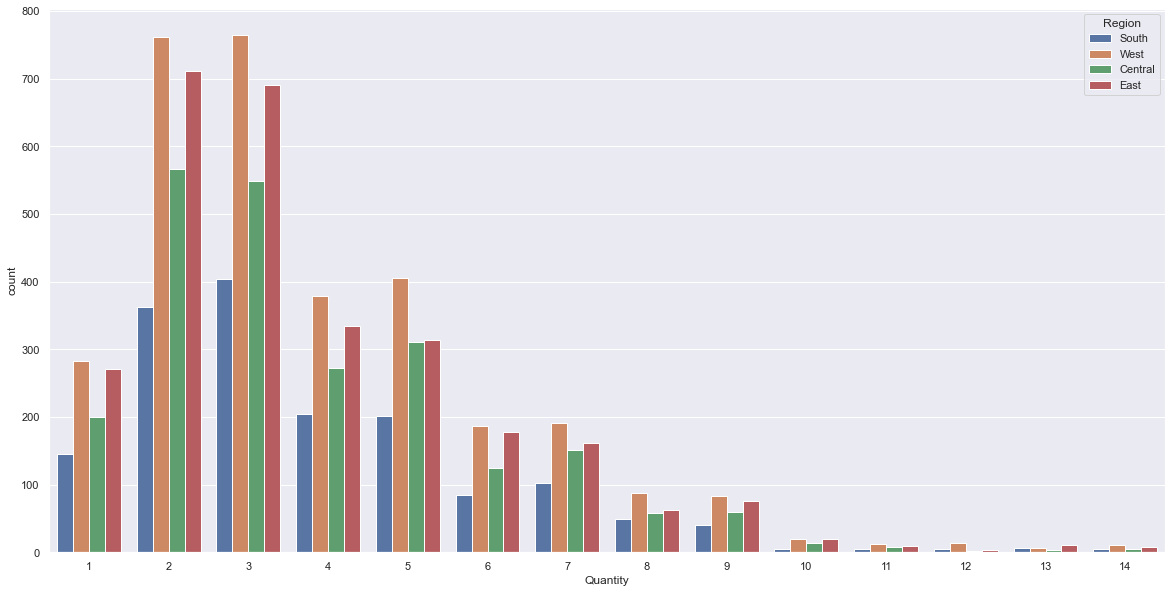

In [227]:
#Countplot Based on different Regions
fig,axes = plt.subplots(1,1,figsize=(20,10))
sns.countplot(store_df["Quantity"],hue = store_df["Region"])
plt.show()

Quantity of 3 is max followed by 2, Quantity of 13 is minimum

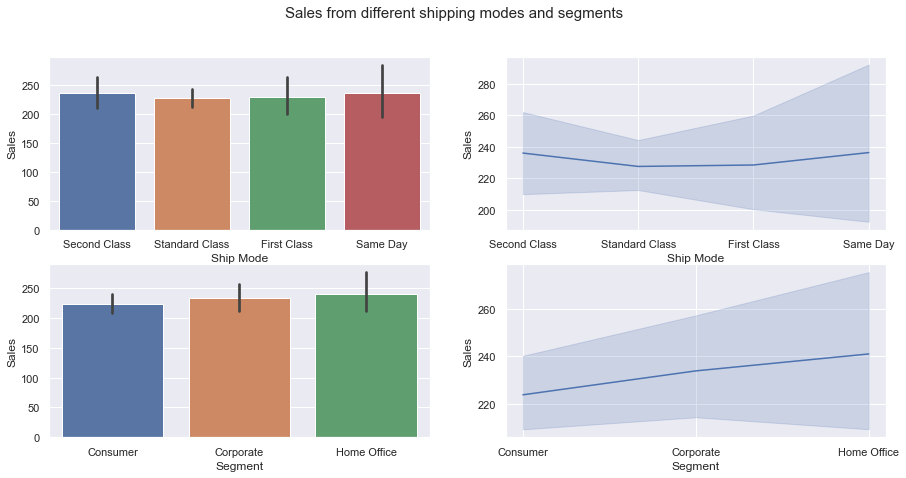

In [228]:
#Sales with different Shipping Models and Segments
fig,axes = plt.subplots(2,2,figsize=(15,7))
fig.suptitle("Sales from different shipping modes and segments",fontsize=15)
sns.barplot(df["Ship Mode"],df["Sales"],ax = axes[0,0])
sns.lineplot(df["Ship Mode"],df["Sales"],ax = axes[0,1])
sns.barplot(df["Segment"],df["Sales"],ax = axes[1,0])
sns.lineplot(df["Segment"],df["Sales"],ax = axes[1,1])
plt.show()

The mode of shipping does not affect much to the sales, Home office provides highest sales with slight variation.

#### Thankyou!